## Fastai tabular with forest fire data set

In [3]:
# import fastai library
from fastai.tabular import *

In [4]:
# Defining path, reading and determining dependent variable, categorical, numerical and process that is needed to be implemented on data set
df = pd.read_csv('../input/forest-fires-data-set/forestfires.csv')
dep_var = 'area'
cat_names = ['month','day']
cont_names = ['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain']
procs = [Categorify, Normalize]

In [5]:
# Making test data frame
test = TabularList.from_df(df.iloc[480:517].copy(), cat_names=cat_names, cont_names=cont_names)

In [6]:
# Let's take a look of our datda
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [23]:
# Making data from tabularl list using our df 
data = (TabularList.from_df(df, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_rand_pct(valid_pct = 0.1, seed = 42)
                           .label_from_df(cols=dep_var, label_cls = FloatList)
                           .add_test(test)
                           .databunch())

In [24]:
data.show_batch()

month,day,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,target
sep,wed,-0.2786,0.5746,0.4098,0.3379,0.6110,0.0669,0.9504,-1.1887,-0.0073,-0.0721,9.41
aug,sun,-0.7127,-0.2442,0.1480,0.4773,0.2178,0.3742,0.1789,-0.3380,0.7766,-0.0721,0.0
mar,mon,-0.2786,-0.2442,-0.5152,-0.9041,-1.7744,-0.8552,-1.3298,0.0874,1.0006,-0.0721,0.0
sep,wed,0.1556,1.3934,0.6541,-0.4003,0.5817,1.5378,1.2247,-1.2494,-0.0073,-0.0721,0.0
aug,fri,0.5897,-1.0631,0.0957,0.4574,0.3287,-0.3942,0.0932,-0.3380,-0.2313,-0.0721,1.56


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,root_mean_squared_error,r2_score,time
0,4998.592773,193.059769,13.894595,-0.247545,00:00
1,4950.430664,192.859879,13.887400,-0.246253,00:00
2,4858.091797,192.469299,13.873330,-0.243729,00:00
3,4815.814941,192.266525,13.866020,-0.242419,00:00
4,4850.830566,192.305191,13.867414,-0.242669,00:00
5,4851.581055,192.345001,13.868850,-0.242926,00:00
6,4867.795898,192.838745,13.886640,-0.246117,00:00
7,4861.434082,193.422852,13.907655,-0.249891,00:00
8,4872.327148,193.899216,13.924770,-0.252970,00:00
9,4819.977539,194.099380,13.931955,-0.254263,00:00


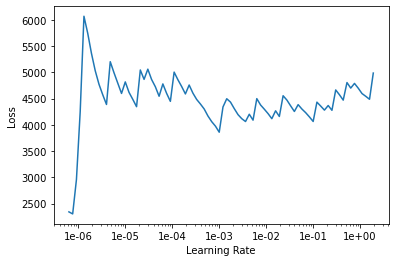

In [37]:
learn = tabular_learner(data, layers=[200,100],metrics= [rmse, r2_score])

#Exploring the learning rates
learn.lr_find()

# we typically find the point where the slope is steepest
learn.recorder.plot()

learn.fit_one_cycle(15, max_lr=1e-03)


In [38]:
#Fitting data and training the network
learn.fit_one_cycle(25)

epoch,train_loss,valid_loss,root_mean_squared_error,r2_score,time
0,4682.324707,195.302307,13.975060,-0.262036,00:00
1,4627.960449,197.255737,14.044776,-0.274659,00:00
2,4637.013184,201.414642,14.192062,-0.301534,00:00
3,4697.722656,207.801331,14.415316,-0.342804,00:00
4,4760.847168,210.625275,14.512935,-0.361053,00:00
5,4750.651855,219.976257,14.831596,-0.421479,00:00
6,4711.178711,229.353607,15.144426,-0.482074,00:00
7,4687.257812,247.130814,15.720395,-0.596950,00:00
8,4680.435059,251.197220,15.849202,-0.623227,00:00
9,4616.385742,292.299744,17.096775,-0.888830,00:00


In [39]:
learn.show_results()

month,day,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,target,prediction
may,sat,0.5897,0.5746,-0.9515,-1.2747,-1.7344,-1.1845,-1.2784,3.0040,0.4966,-0.0721,0.0,[15.893145]
aug,tue,1.0239,0.5746,0.9683,1.0699,0.4973,1.1865,0.4875,1.2419,0.4966,2.5120,0.0,[8.160648]
aug,mon,1.4580,1.3934,0.2702,1.4666,0.5029,-0.1527,1.1561,-0.9456,-1.2392,-0.0721,1.23,[7.578692]
sep,fri,0.1556,-0.2442,0.6541,-0.4003,0.5817,1.5378,0.2303,0.1481,0.4966,-0.0721,1.46,[2.199336]
aug,wed,-1.1468,-0.2442,0.6890,0.4313,0.5689,2.4379,1.7905,-0.8849,0.4966,-0.0721,1.95,[0.242194]


In [40]:
#Display Predictions On Training Data
learn.show_results(ds_type=DatasetType.Train,rows = 5)
#Display Predictions On Validation Data
learn.show_results(ds_type=DatasetType.Valid)

month,day,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,target,prediction
sep,thu,-1.5810,-1.8819,0.4098,0.3946,0.6382,0.0669,1.1390,-1.0672,-1.0152,-0.0721,0.0,[13.761573]
sep,tue,0.5897,0.5746,0.2353,0.0071,0.8940,-0.5259,0.4018,-0.5810,-0.7353,-0.0721,5.65,[9.611258]
sep,fri,-1.5810,-0.2442,0.3400,0.1648,0.9717,0.2864,0.4018,-0.3380,-1.0152,-0.0721,8.12,[3.833327]
feb,sat,-0.2786,0.5746,-1.0213,-1.5780,-1.9698,-1.3163,-0.7812,0.0874,-0.0073,-0.0721,0.0,[2.125994]
sep,sat,0.5897,0.5746,0.1131,-0.2594,0.7903,-0.1088,-0.5754,0.7558,0.4966,-0.0721,39.35,[4.30094]


month,day,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,target,prediction
may,sat,0.5897,0.5746,-0.9515,-1.2747,-1.7344,-1.1845,-1.2784,3.0040,0.4966,-0.0721,0.0,[15.893145]
aug,tue,1.0239,0.5746,0.9683,1.0699,0.4973,1.1865,0.4875,1.2419,0.4966,2.5120,0.0,[8.160648]
aug,mon,1.4580,1.3934,0.2702,1.4666,0.5029,-0.1527,1.1561,-0.9456,-1.2392,-0.0721,1.23,[7.578692]
sep,fri,0.1556,-0.2442,0.6541,-0.4003,0.5817,1.5378,0.2303,0.1481,0.4966,-0.0721,1.46,[2.199336]
aug,wed,-1.1468,-0.2442,0.6890,0.4313,0.5689,2.4379,1.7905,-0.8849,0.4966,-0.0721,1.95,[0.242194]


In [41]:
#Getting The Training And Validation Errors
tr = learn.validate(learn.data.train_dl)
va = learn.validate(learn.data.valid_dl)
print("The Metrics used In Evaluating The Network:", str(learn.metrics))
print("\nThe calculated RMSE & R-Squared For The Training Set :", tr[1:])
print("\nThe calculated RMSE & R-Squared For The Validation Set :", va[1:])

The Metrics used In Evaluating The Network: [<function root_mean_squared_error at 0x7fa05f2c5b90>, <function r2_score at 0x7fa05f2c5d40>]

The calculated RMSE & R-Squared For The Training Set : [tensor(42.1683), tensor(0.2911)]

The calculated RMSE & R-Squared For The Validation Set : [tensor(18.6743), tensor(-1.2535)]


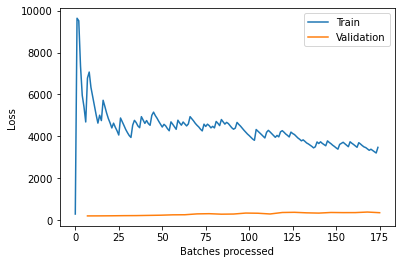

In [42]:
#Plotting The losses for training and validation
learn.recorder.plot_losses()